<a href="https://colab.research.google.com/github/nguyenquyha/IHC-method/blob/master/linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

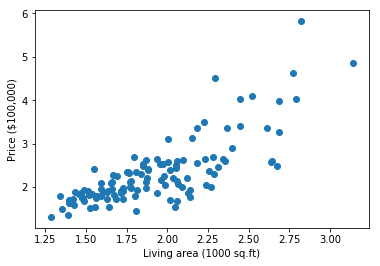

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


url = "https://www.openintro.org/stat/data/ames.csv"
df = pd.read_csv(url)

# only care about 2-story houses sold in 2009
new_house = (df["MS.SubClass"] == 60) & (df["Yr.Sold"] == 2009)

price = df['SalePrice'][new_house]/100000
area = df['Gr.Liv.Area'][new_house]/1000
bedroom = df['Bedroom.AbvGr'][new_house]

# Part (a): plot the data
plt.scatter(area, price)
plt.xlabel(r"Living area (1000 sq.ft)")
plt.ylabel("Price ($100,000)")
plt.show()


In [3]:
# Part (b): Least squares solution
import numpy as np

X = np.vstack([np.ones(len(area)), area, bedroom]).T
y = np.asarray(price)
Xt = X.T # transpose matrix X
inv_mat = np.linalg.inv(Xt.dot(X))
theta = inv_mat.dot(Xt).dot(y)
print("theta = {}".format(theta))

theta = [-0.21682936  1.74713773 -0.25150618]


theta = [-0.21682936  1.74713773 -0.25150618]


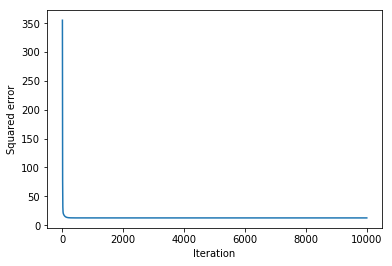

In [4]:
# Part (c): Gradient descent

#================================================================
# Function to perform gradient descent for linear regression  
#================================================================

def GD_LR(X, y, theta_init, lr, iter_num):
  
  Xt = X.T
  XtX = Xt.dot(X)
  theta = theta_init
  loss = np.zeros(iter_num)
  
  for iter in range(iter_num):
     # compute squared error
    loss[iter] = 0.5 * np.linalg.norm(X.dot(theta) - y)**2
    
    # compute the gradient
    grad = XtX.dot(theta) - Xt.dot(y)
  
    # update theta
    theta = theta - lr * grad
    
  return theta, loss

#================================================================
# MAIN 
#================================================================

theta_init = np.zeros(X.shape[1]) # initialization
lr = 0.001 # learning rate
iter_num = 10000 # number of iterations in Gradient Descent

theta, loss = GD_LR(X, y , theta_init, lr, iter_num)

print("theta = {}".format(theta))
plt.plot(loss)
plt.xlabel("Iteration")
plt.ylabel("Squared error")
plt.show()


In [0]:
# part (c): Linear Regression using Scikitlearn library

from sklearn.linear_model import LinearRegression

X_orig = X[:, 1:] # we no longer need the first column

# Train the model using the training sets
reg = LinearRegression().fit(X_orig, y)

# Print the results
print("coefficients: {}".format(reg.coef_))
print("intercept: {:0.8f}".format(reg.intercept_))

coefficients: [ 1.74713773 -0.25150618]
intercept: -0.21682936
